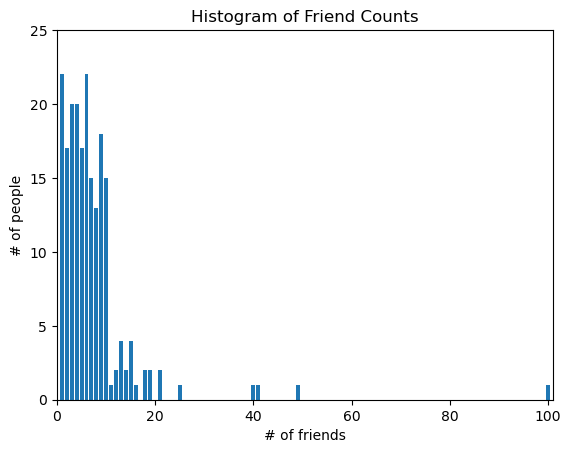

In [12]:
from collections import Counter
import matplotlib.pyplot as plt
# %matplotlib inline

num_friends = [100,49,41,40,25,21,21,19,19,18,18,16,15,15,15,15,14,14,13,13,13,13,12,12,11,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,8,8,8,8,8,8,8,8,8,8,8,8,8,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]

def make_friend_counts_histogram():
    friend_counts = Counter(num_friends)
    xs = range(101)
    ys = [friend_counts[x] for x in xs]
    plt.bar(xs, ys)
    plt.axis([0,101,0,25])
    plt.title("Histogram of Friend Counts")
    plt.xlabel("# of friends")
    plt.ylabel("# of people")
    plt.show()

make_friend_counts_histogram()

In [17]:
num_points = len(num_friends)               # 204

largest_value = max(num_friends)            # 100
smallest_value = min(num_friends)           # 1

sorted_values = sorted(num_friends)
smallest_value = sorted_values[0]           # 1
second_smallest_value = sorted_values[1]    # 1
second_largest_value = sorted_values[-2]    # 49

def mean(xs) -> float:
    return sum(xs) / len(xs)
mean(num_friends)

7.333333333333333

In [19]:
def median(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2

    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
median(num_friends)

6.0

In [22]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print(quantile(num_friends, 0.25))

assert quantile(num_friends, 0.10) == 1
assert quantile(num_friends, 0.25) == 3
assert quantile(num_friends, 0.75) == 9
assert quantile(num_friends, 0.90) == 13

3


In [27]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

assert set(mode(num_friends)) == {1, 6}

mode(num_friends)

[6, 1]

In [30]:
def data_range(x):
    return max(x) - min(x)

print(data_range(num_friends))

assert data_range(num_friends) == 99

In [32]:
from linear_algebra import sum_of_squares

def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

print(de_mean(num_friends))

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

print(variance(num_friends))

assert 81.54 < variance(num_friends) < 81.55

[92.66666666666667, 41.666666666666664, 33.666666666666664, 32.666666666666664, 17.666666666666668, 13.666666666666668, 13.666666666666668, 11.666666666666668, 11.666666666666668, 10.666666666666668, 10.666666666666668, 8.666666666666668, 7.666666666666667, 7.666666666666667, 7.666666666666667, 7.666666666666667, 6.666666666666667, 6.666666666666667, 5.666666666666667, 5.666666666666667, 5.666666666666667, 5.666666666666667, 4.666666666666667, 4.666666666666667, 3.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 2.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1.666666666666667, 1

In [34]:
import math

def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends)

9.03014473623248

In [36]:
def interquartile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

interquartile_range(num_friends)

6

In [37]:
from linear_algebra import dot
daily_minutes = [1,68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

def covariance(x, y):
    assert len(x) == len(y)
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

covariance(num_friends, daily_minutes)

22.425435139573064

In [39]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / (stdev_x * stdev_y)
    else:
        return 0 # if no variation, correlation is zero
    
correlation(num_friends, daily_minutes)

0.24736957366478216

In [43]:
outlier = num_friends.index(100) 

num_friends_good = [x for i, x in enumerate(num_friends) if i != outlier]

daily_minutes_good = [x for i, x in enumerate(daily_minutes) if i != outlier]

daily_hours_good = [dm / 60 for dm in daily_minutes_good]

correlation(num_friends_good, daily_minutes_good)
correlation(num_friends_good, daily_hours_good)

0.5736792115665579